In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
songs_raw = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\EDM Sub-genre classifier\songs_raw.csv')
genres = ['house','techno','dnb','hardstyle','trap']

In [3]:
songs_raw.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,0.786,0.870,2.0,-5.839,1.0,0.0507,0.04930,0.215000,0.0863,0.676,126.011,audio_features,7LVEBvmKB5uDTg0CGqDo3p,spotify:track:7LVEBvmKB5uDTg0CGqDo3p,https://api.spotify.com/v1/tracks/7LVEBvmKB5uD...,https://api.spotify.com/v1/audio-analysis/7LVE...,192482.0,4.0,house
1,0.740,0.934,7.0,-3.255,1.0,0.3160,0.00822,0.000377,0.1160,0.685,124.936,audio_features,0m69QNuZVZDXhGHBGK1mQA,spotify:track:0m69QNuZVZDXhGHBGK1mQA,https://api.spotify.com/v1/tracks/0m69QNuZVZDX...,https://api.spotify.com/v1/audio-analysis/0m69...,154680.0,4.0,house
2,0.889,0.859,11.0,-5.110,1.0,0.2050,0.02160,0.106000,0.7370,0.828,124.958,audio_features,4PfzZIFxK10aHXupOm4qEu,spotify:track:4PfzZIFxK10aHXupOm4qEu,https://api.spotify.com/v1/tracks/4PfzZIFxK10a...,https://api.spotify.com/v1/audio-analysis/4Pfz...,142560.0,4.0,house
3,0.840,0.868,11.0,-6.173,0.0,0.0721,0.02590,0.573000,0.0891,0.851,126.001,audio_features,6uABa7vKOgFqXnwvk8NBr5,spotify:track:6uABa7vKOgFqXnwvk8NBr5,https://api.spotify.com/v1/tracks/6uABa7vKOgFq...,https://api.spotify.com/v1/audio-analysis/6uAB...,203810.0,4.0,house
4,0.740,0.989,10.0,-4.193,1.0,0.0469,0.00276,0.956000,0.3060,0.934,125.001,audio_features,6fcHhf9bix2uLbKHApSkNy,spotify:track:6fcHhf9bix2uLbKHApSkNy,https://api.spotify.com/v1/tracks/6fcHhf9bix2u...,https://api.spotify.com/v1/audio-analysis/6fcH...,142080.0,4.0,house


In [18]:
songs_SAVE = songs_raw

In [19]:
songs_raw.shape

(34496, 19)

In [20]:
songs_raw.to_csv(r'C:\Users\Chetan\Desktop\College\Python\EDM Sub-genre classifier\songs_raw.csv')

In [4]:
print("Shape of the raw database of extracted songs:",songs_raw.shape)

Shape of the raw database of extracted songs: (34496, 19)


In [5]:
# Not using this one, manually cleaning the database

def clean_database(df):
    result = df
    # Remove Duplicates from DataFrame
    result = result.drop_duplicates(subset = "uri", keep = 'first', inplace = False, ignore_index = True)
    # Remove Long Duration Songs
    result = result[result.duration_ms < 1000000]
    # Remove low tempo songs
    result = result[result.tempo > 50]
    return result

In [6]:
songs = songs_raw.drop_duplicates(subset = "uri", keep = 'first', inplace = False, ignore_index = True)

In [7]:
def graph_tempo(genre, df):
    tempo = songs.loc[songs.genre == genre, 'tempo']
    
    plt.title('Song Tempo')
    plt.hist(tempo, bins=40, range=(min(songs.tempo), 190), alpha=0.7,label=genre)
    plt.grid(b=True)
    plt.legend(loc='upper right')
    plt.xlabel('Tempo')
    plt.ylabel('Count')

In [8]:
def range_outliers(genre, df):
    tempo = songs.loc[songs.genre == genre, 'tempo']
    m = np.mean(tempo)
    sd = np.std(tempo)
    median = np.median(tempo)
    upper_bound = m + (sd*3)
    lower_bound = m - (sd*3)
    print(lower_bound, upper_bound)

In [9]:
for genre in genres:
    print(genre)
    print(songs.loc[songs.genre == genre, 'tempo'].describe())
    range_outliers(genre, songs)

house
count    3166.000000
mean      125.030344
std         2.470549
min       104.978000
25%       123.993000
50%       124.997000
75%       126.007000
max       154.983000
Name: tempo, dtype: float64
117.6198678831984 132.44082005110357
techno
count    4028.000000
mean      129.716629
std         6.453198
min        74.994000
25%       126.002000
50%       128.030000
75%       132.005000
max       215.898000
Name: tempo, dtype: float64
110.35943720915463 149.0738199904481
dnb
count    4139.000000
mean      162.021669
std        29.013622
min        38.490000
25%       172.017000
50%       173.989000
75%       174.051000
max       222.704000
Name: tempo, dtype: float64
74.99131731908159 249.05202068526728
hardstyle
count    5896.000000
mean      145.156411
std        20.890446
min        72.532000
25%       149.931000
50%       150.006000
75%       150.180750
max       200.070000
Name: tempo, dtype: float64
82.49038848514223 207.82243410644534
trap
count    6805.000000
mean      130.2

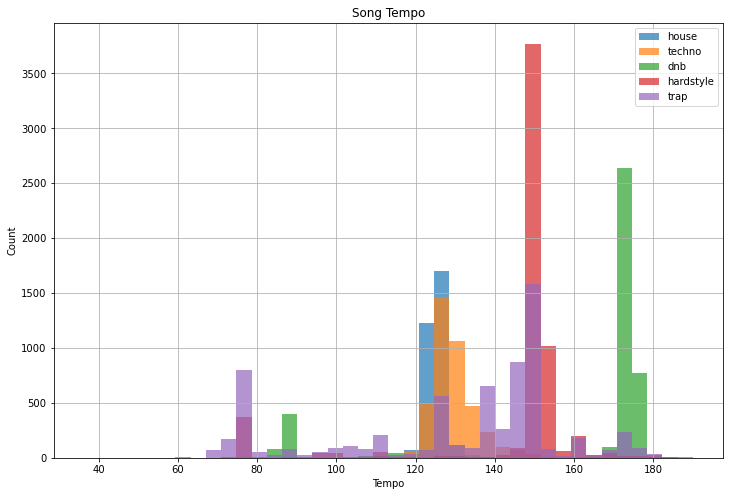

In [10]:
fig = plt.figure(figsize=(12,8))
plt.title('Song Tempo')

for genre in genres:
    graph_tempo(genre, songs)

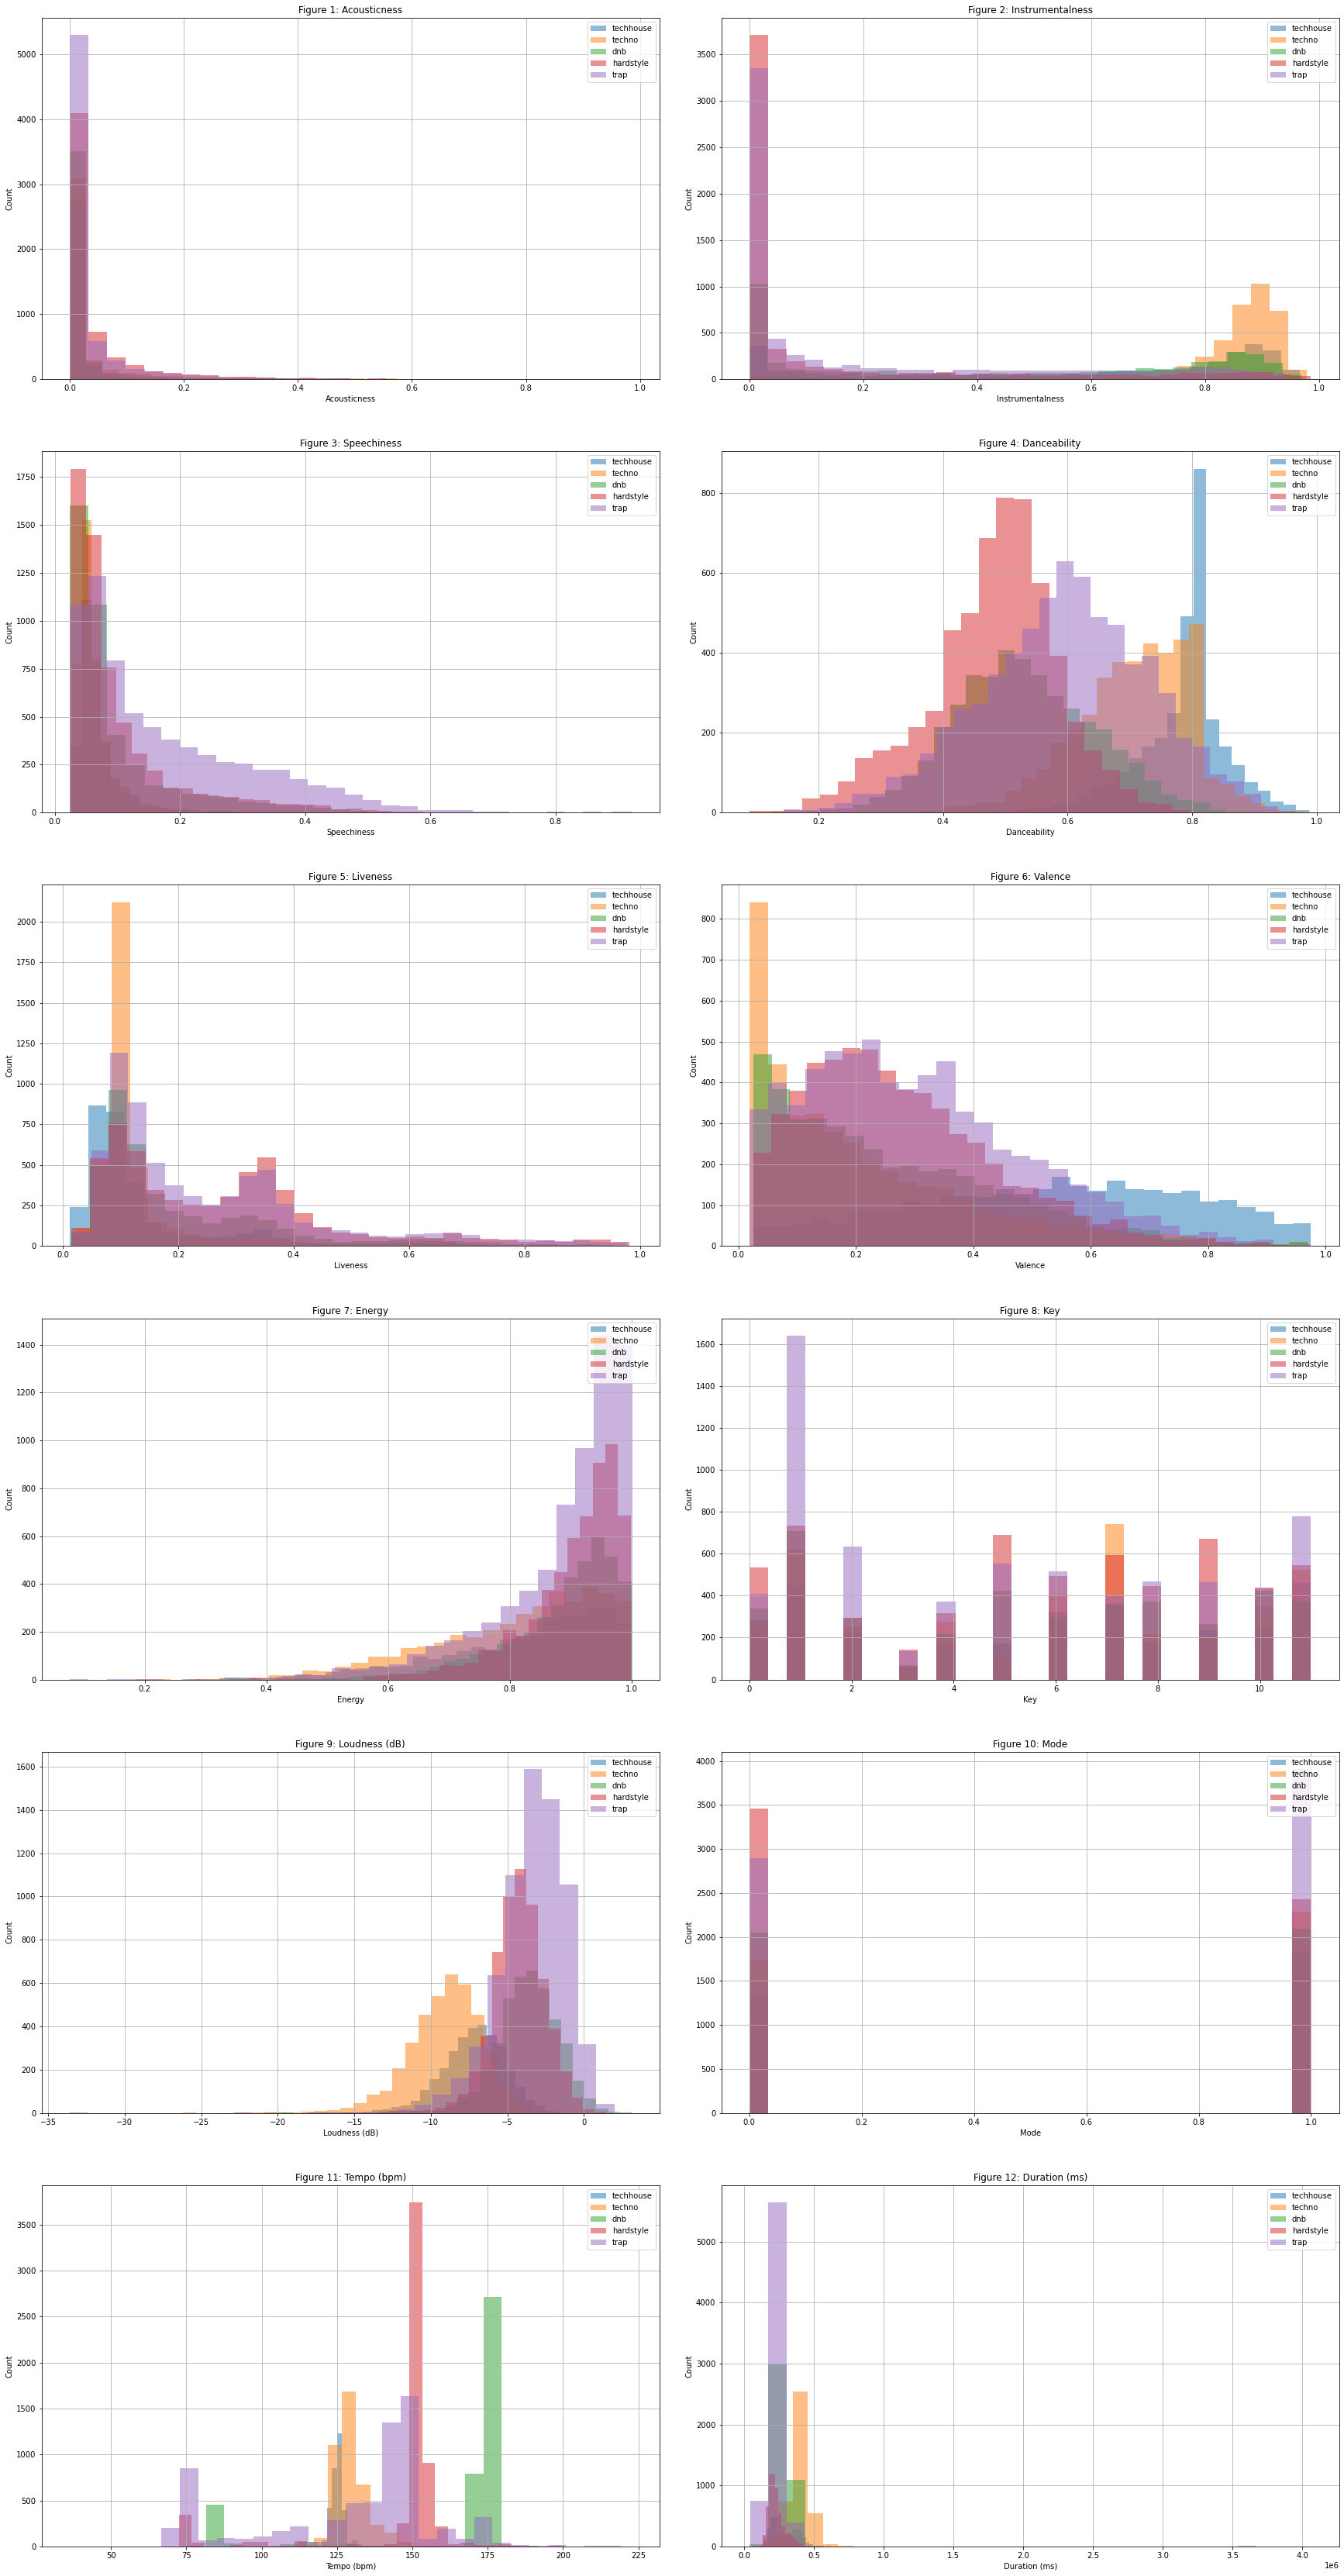

In [11]:
features = ['acousticness', 'instrumentalness', 'speechiness', 'danceability',
           'liveness', 'valence', 'energy', 'key', 'loudness', 'mode', 'tempo', 'duration_ms']

xlabels = ['Acousticness', 'Instrumentalness', 'Speechiness', 'Danceability',
          'Liveness', 'Valence', 'Energy', 'Key', 'Loudness (dB)',
          'Mode', 'Tempo (bpm)', 'Duration (ms)']

fig, axis = plt.subplots(nrows=6, ncols=2)
fig.set_size_inches(30,60)
fig.subplots_adjust(wspace=0.1)

ax = np.ravel(axis)

for i,feature in enumerate(features):
    ax[i].set_xlabel(xlabels[i])
    ax[i].set_ylabel('Count')
    ax[i].set_title('Figure {}: {}'.format(i+1, xlabels[i]))
    ax[i].hist(songs[songs['genre'] == 'house'][feature], alpha=0.5, bins=30, label='techhouse')
    ax[i].hist(songs[songs['genre'] == 'techno'][feature], alpha=0.5, bins=30, label='techno')
    ax[i].hist(songs[songs['genre'] == 'dnb'][feature], alpha=0.5, bins=30, label='dnb')
    ax[i].hist(songs[songs['genre'] == 'hardstyle'][feature], alpha=0.5, bins=30, label='hardstyle')
    ax[i].hist(songs[songs['genre'] == 'trap'][feature], alpha=0.5, bins=30, label='trap')    
    ax[i].legend(loc='upper right')
    ax[i].grid(1)

In [12]:
songs.isnull().sum()

danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
type                1
id                  1
uri                 1
track_href          1
analysis_url        1
duration_ms         1
time_signature      1
genre               0
dtype: int64

In [13]:
songs.dropna(axis=0, inplace=True)

In [14]:
songs.shape

(24033, 19)

In [17]:
songs.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genre               0
dtype: int64

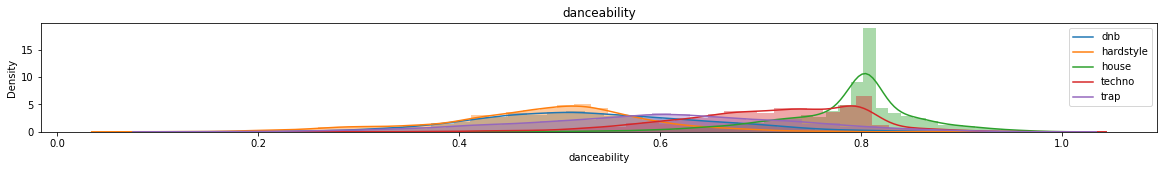

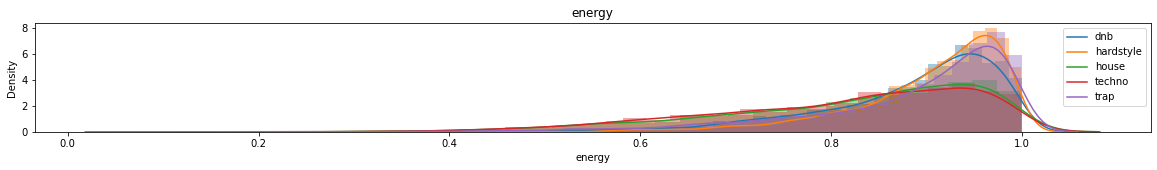

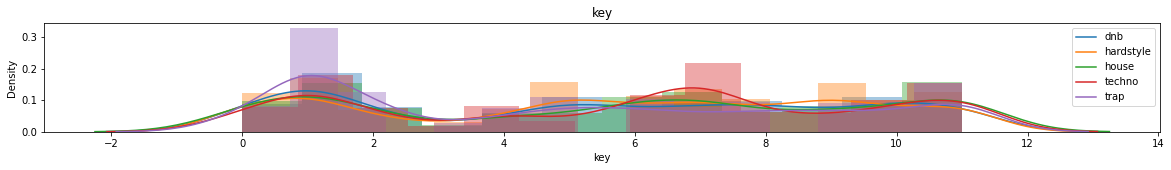

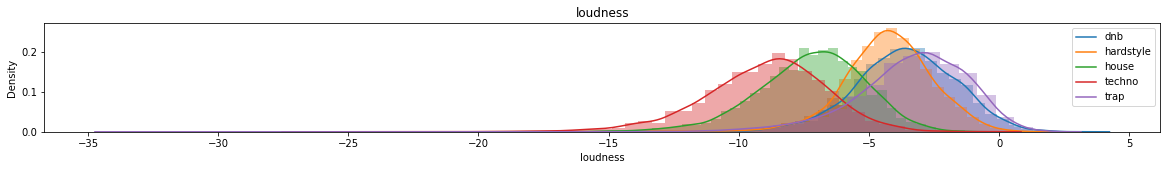

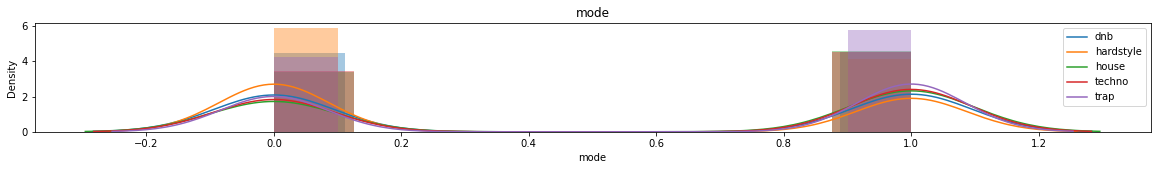

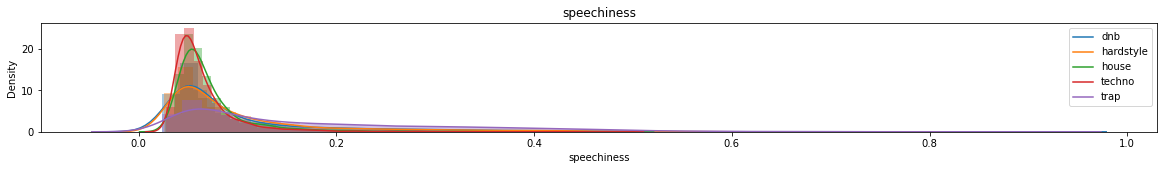

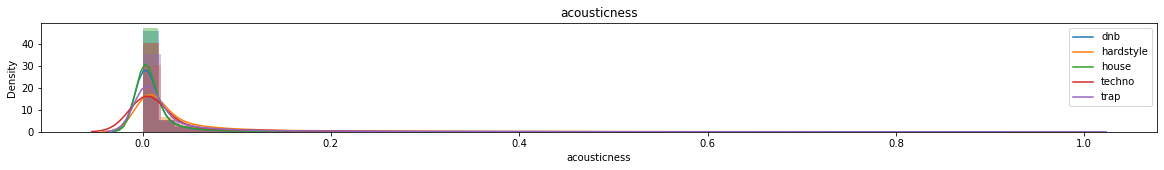

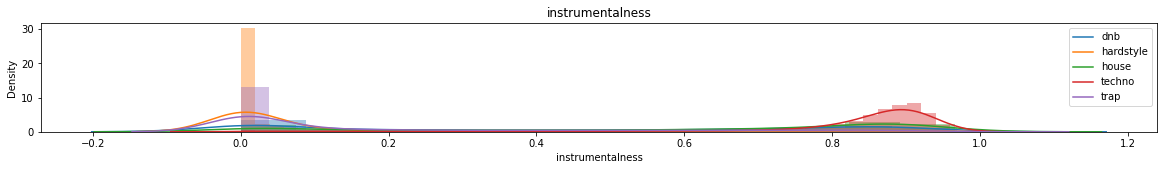

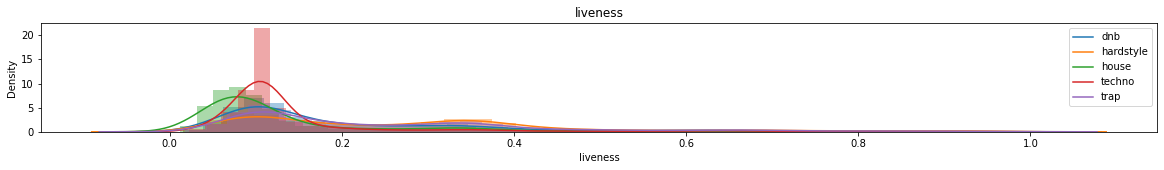

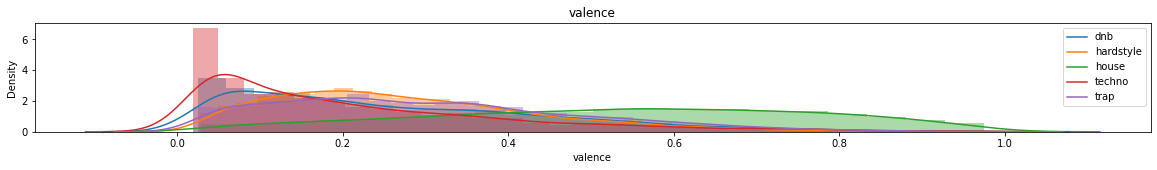

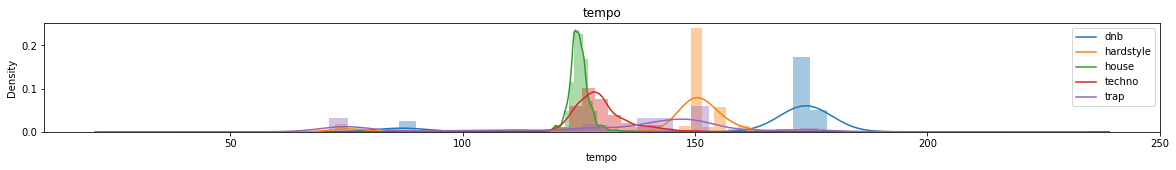

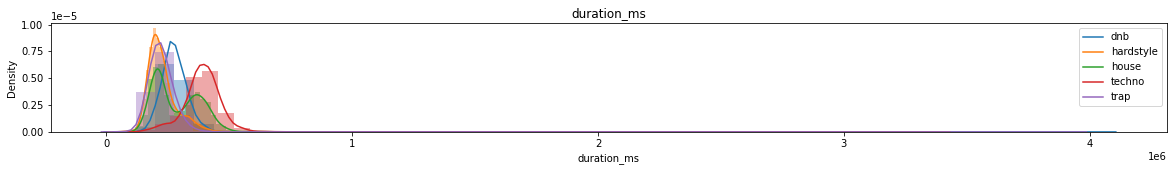

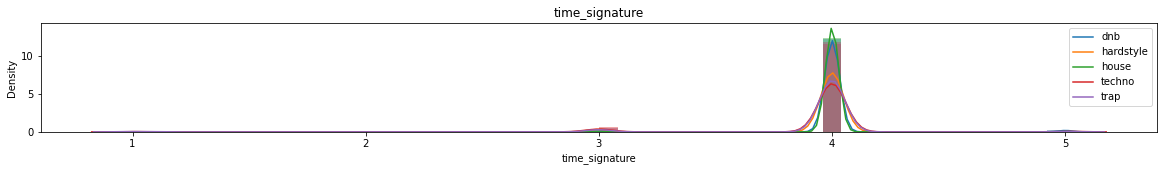

In [16]:
# Show the distibutions of each numeric variable, separated by genre

# Loop through each numeric column
for col in songs.select_dtypes(include='number').columns:
    # Create a list of labels for the legend
    labels = []
    # Create a figure to show distributions
    plt.figure(figsize=(20,2))
    # Group the data by genre and loop through each group
    for genre, group in songs.groupby('genre'):
        # Plot the distribution of the given column for the given genre
        sns.distplot(group[col])
        # Add the genre to the legend list
        labels.append(genre)
    # Plot the legend
    plt.legend(labels)
    # Title the plot by column
    plt.title(col)
    # Show the figure
    plt.show()